# Methods and Imports

In [101]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

time_utilization_graph = []
idle_power_watt = 0.212
max_power_watt = 0.597
xLabelCount = 13

def power_estimation(percentage, factor):
    scaling_power = factor * max_power_watt -  factor *idle_power_watt
    return factor * idle_power_watt + scaling_power * percentage

def analyse_load_graph(file_to_analyze):
    time_utilization_graph.clear()
    load = []
    with open(file_to_analyze, 'r') as load_csv_file:
        debug_index = 0
        year = csv.reader(load_csv_file, delimiter=',')
        for hour in year:
            debug_index = debug_index + 1
            time_utilization_graph.append(hour[0][:-3])
            load.append(float(hour[8]))
    return load

def analyse_power_consumption(cpu_utilization,factor=1):
    power_consumption_of_cluster = []
    for cluster_utilization_measured in cpu_utilization:
        
        power_consumption_of_cluster.append(power_estimation(cluster_utilization_measured / 100, factor))
    return power_consumption_of_cluster

# Parameters and Constants

In [102]:
FOLDER = "benchmark_10"
START_HOUR = 5


# Get data

In [116]:
# $logTimeStamp,$logCPUMili,$logCPUPercent,$logCpuPercentPrecise,$logcpuMiliReservation,$logcpuPercentReservation,$logcpuPreciseReservation,$logCPUMili2,$logCPUPercent2,$logCpuPercentPrecise2,$logcpuMiliReservation2,$logcpuPercentReservation2,$logcpuPreciseReservation2
optimized = pd.read_csv(FOLDER+'/optimized.csv', names=['TimeStamp','CPUMili','CPUPercent','CpuPercentPrecise','cpuMiliReservation','cpuPercentReservation','cpuPreciseReservation','CPUMili2','CPUPercent2','CpuPercentPrecise2','cpuMiliReservation2','cpuPercentReservation2','cpuPreciseReservation2', 'SLA'])
optimized.index = optimized['TimeStamp']
unoptimized = pd.read_csv(FOLDER+'/unoptimized.csv', names=['TimeStamp','CPUMili','CPUPercent','CpuPercentPrecise','cpuMiliReservation','cpuPercentReservation','cpuPreciseReservation','CPUMili2','CPUPercent2','CpuPercentPrecise2','cpuMiliReservation2','cpuPercentReservation2','cpuPreciseReservation2', 'SLA'])
unoptimized.index = unoptimized['TimeStamp']
optimized = optimized.drop(columns=['TimeStamp'])
unoptimized = unoptimized.drop(columns=['TimeStamp'])

co2_prediction_data = np.genfromtxt(FOLDER+'/co2_prediction.csv')
real_co2_emission_data = np.genfromtxt(FOLDER+'/co2_emission.csv')
co2_prediction_data2 = np.genfromtxt(FOLDER+'/co2_prediction2.csv')
real_co2_emission_data2 = np.genfromtxt(FOLDER+'/co2_emission2.csv')

# normalize SLA
i = 0
for v in unoptimized['SLA']:
    if v > 0:
        v-=1
    unoptimized['SLA'][i] = v
    i+=1
i = 0
for v in optimized['SLA']:
    if v > 0:
        v-=1
    optimized['SLA'][i] = v
    i+=1

c:\Users\moria\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\moria\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [104]:
optimized.tail()

,CPUMili,CPUPercent,CpuPercentPrecise,cpuMiliReservation,cpuPercentReservation,cpuPreciseReservation,CPUMili2,CPUPercent2,CpuPercentPrecise2,cpuMiliReservation2,cpuPercentReservation2,cpuPreciseReservation2,SLA
TimeStamp,,,,,,,,,,,,,
Sun 04:56:00,91m,4%,4.55,1072,53,53.6,26m,1%,1.30,100,5,5.0,0
Sun 04:57:00,88m,4%,4.40,998,49,49.9,26m,1%,1.30,100,5,5.0,0
Sun 04:58:00,87m,4%,4.35,998,49,49.9,26m,1%,1.30,100,5,5.0,0
Sun 04:59:00,87m,4%,4.35,998,49,49.9,24m,1%,1.20,100,5,5.0,0
Sun 05:00:00,88m,4%,4.40,924,46,46.2,25m,1%,1.25,100,5,5.0,0


In [105]:

unoptimized.tail()

,CPUMili,CPUPercent,CpuPercentPrecise,cpuMiliReservation,cpuPercentReservation,cpuPreciseReservation,CPUMili2,CPUPercent2,CpuPercentPrecise2,cpuMiliReservation2,cpuPercentReservation2,cpuPreciseReservation2,SLA
TimeStamp,,,,,,,,,,,,,
Mon 04:56:00,94m,4%,4.70,850,42,42.5,39m,1%,1.95,322,16,16.1,0
Mon 04:57:00,93m,4%,4.65,850,42,42.5,34m,1%,1.70,248,12,12.4,0
Mon 04:58:00,92m,4%,4.60,850,42,42.5,33m,1%,1.65,248,12,12.4,0
Mon 04:59:00,92m,4%,4.60,850,42,42.5,36m,1%,1.80,248,12,12.4,0
Mon 05:00:00,96m,4%,4.80,850,42,42.5,37m,1%,1.85,174,8,8.7,0


# Plot CPU Reservation

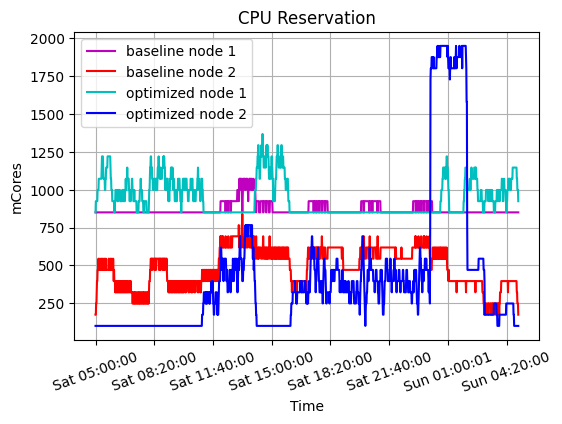

In [106]:
unoptimized['cpuMiliReservation'].plot(label='baseline node 1',color='m',legend=True)
unoptimized['cpuMiliReservation2'].plot(label='baseline node 2', rot=20, color='r',legend=True)
optimized['cpuMiliReservation'].plot(label='optimized node 1', color='c',title='CPU Reservation',figsize=(6,4),legend=True)
optimized['cpuMiliReservation2'].plot(label='optimized node 2',color='b',rot=20, legend=True,grid=True,ylabel='mCores', xlabel='Time')
plt.savefig("cpuReservation_"+FOLDER+".pdf", bbox_inches="tight")

# Plot Power Model

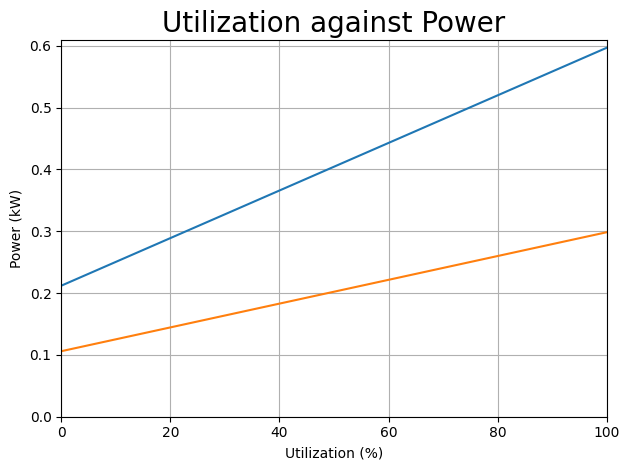

In [107]:
utilization_list = []
power_consumption_list = []

power_consumption_list2 = []

for i in range(0, 11):
    utilization = i * 0.1
    utilization_list.append(utilization * 100)
    power_consumption_list.append(power_estimation(utilization,1))
    power_consumption_list2.append(power_estimation(utilization,0.5))

plt.clf()
plt.ylim(0, max(power_consumption_list) * 1.02)
plt.xlim(0, max(utilization_list))
plt.title('Utilization against Power', fontsize=20)
plt.xlabel('Utilization (%)')
plt.ylabel('Power (kW)')

plt.grid()

plt.plot(utilization_list, power_consumption_list)
plt.plot(utilization_list,power_consumption_list2)
plt.tight_layout()
file_title = "power_model"
plt.get_current_fig_manager().set_window_title(file_title)
plt.savefig(file_title + ".pdf")

# Calculate Graph for Power Consumption

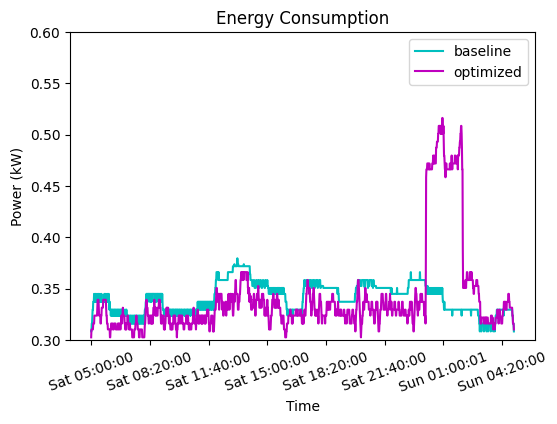

In [108]:
unoptimized['energyConsumption'] = analyse_power_consumption(unoptimized['cpuPercentReservation'].to_numpy(),.5)
unoptimized['energyConsumption2'] = analyse_power_consumption(unoptimized['cpuPercentReservation2'].to_numpy(),.5)
unoptimized['energyConsumptionTotal'] = unoptimized['energyConsumption'] + unoptimized['energyConsumption2']
optimized['energyConsumption'] = analyse_power_consumption(optimized['cpuPercentReservation'].to_numpy(),.5)
optimized['energyConsumption2'] = analyse_power_consumption(optimized['cpuPercentReservation2'].to_numpy(),.5)
optimized['energyConsumptionTotal'] = optimized['energyConsumption'] + optimized['energyConsumption2']


unoptimized['energyConsumptionTotal'].plot(label='baseline', color='c',legend=True,rot=20,ylabel='Power (kW)')
optimized['energyConsumptionTotal'].plot(label='optimized',color='m',ylim=(0.3,0.6),title='Energy Consumption',figsize=(6,4),legend=True, rot=20, xlabel='Time')
plt.savefig("EnergyConsumption_"+FOLDER+".pdf", bbox_inches="tight")

# CO2 Efficiency Graph

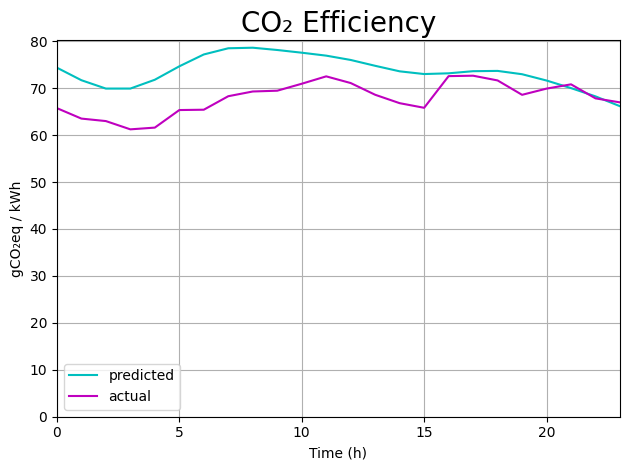

In [109]:
co2_emission_time = range(0, 24)
plt.plot(co2_emission_time, co2_prediction_data, color='c', linestyle='solid', label="predicted")
plt.plot(co2_emission_time, real_co2_emission_data, color='m', linestyle='solid', label="actual")
plt.title('CO₂ Efficiency', fontsize=20)
plt.grid()
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('gCO₂eq / kWh')

plt.ylim(0, max(max(real_co2_emission_data), max(co2_prediction_data)) * 1.02)
plt.xlim(0, max(co2_emission_time))
plt.tight_layout()

# Calculate Total Emissions

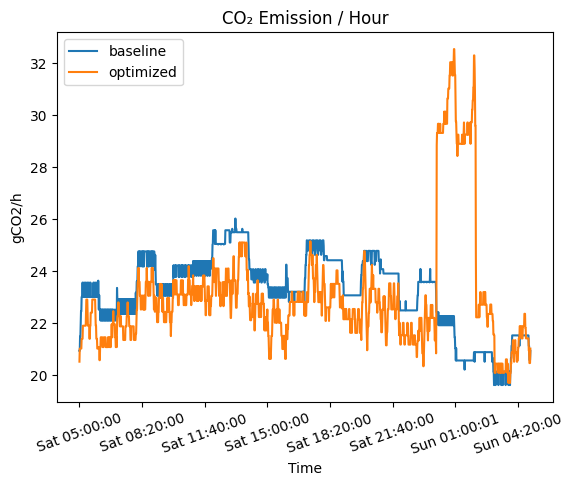

In [110]:
co2_unoptimized_sum = 0.0
co2_unoptimized_accumulated = []
co2_per_hour_unoptimized = []

co2_optimized_sum = 0.0
co2_optimized_accumulated = []
co2_per_hour_optimized = []

co2_per_hour_versus = []
for index in range(0, unoptimized['energyConsumption'].size):
    co2_hour_index = (int(index / 60) + START_HOUR) % 24  # create for lookup
    current_co2_unoptimized = unoptimized['energyConsumption'][index]* real_co2_emission_data[co2_hour_index] + unoptimized['energyConsumption2'][index]* real_co2_emission_data2[co2_hour_index]
    co2_unoptimized_sum = co2_unoptimized_sum + (current_co2_unoptimized / 60)
    co2_unoptimized_accumulated.append(co2_unoptimized_sum)
    co2_per_hour_unoptimized.append(current_co2_unoptimized)

    current_co2_optimized = optimized['energyConsumption'][index]* real_co2_emission_data[co2_hour_index] + optimized['energyConsumption2'][index]* real_co2_emission_data2[co2_hour_index]
    co2_optimized_sum = co2_optimized_sum + (current_co2_optimized / 60)
    co2_optimized_accumulated.append(co2_optimized_sum)
    co2_per_hour_optimized.append(current_co2_optimized)

    co2_per_hour_versus.append(co2_unoptimized_sum - co2_optimized_sum)

unoptimized['co2PerHour'] = co2_per_hour_unoptimized
optimized['co2PerHour'] = co2_per_hour_optimized
unoptimized['co2Accumulated'] = co2_unoptimized_accumulated
optimized['co2Accumulated'] = co2_optimized_accumulated
optimized['co2PerHourVersus'] = co2_per_hour_versus
unoptimized['co2PerHour'].plot(label='baseline', legend=True)
optimized['co2PerHour'].plot(rot=20, label='optimized', legend=True, ylabel='gCO2/h', title='CO₂ Emission / Hour', xlabel='Time')
plt.savefig("CarbonEmissionPerHour_"+FOLDER+".pdf", bbox_inches="tight")

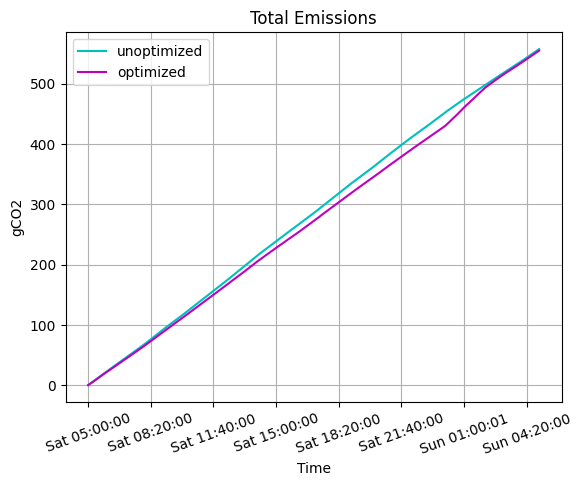

In [111]:
unoptimized['co2Accumulated'].plot(label='unoptimized', color='c', legend=True)
optimized['co2Accumulated'].plot(label='optimized', legend=True, color='m', grid=True, ylabel='gCO2', rot=20, title='Total Emissions', xlabel='Time')
plt.savefig("TotalEmissions_"+FOLDER+".pdf", bbox_inches="tight")

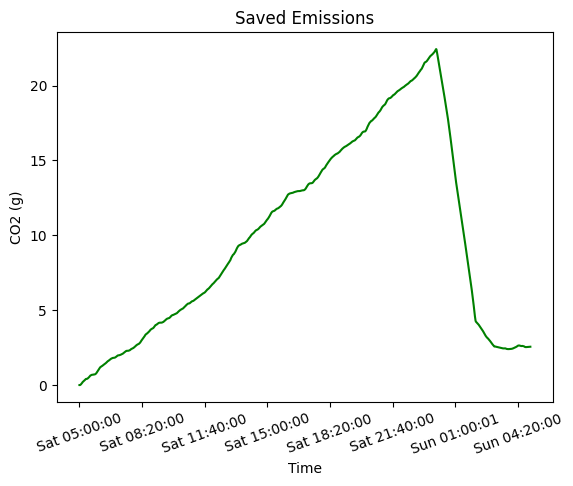

In [112]:
optimized['co2PerHourVersus'].plot(rot=20, color='g', ylabel='CO2 (g)', title='Saved Emissions', xlabel='Time')
plt.savefig("SavedEmissions_"+FOLDER+".pdf", bbox_inches="tight")

In [113]:
print(co2_per_hour_versus[-1])
co2_per_hour_versus[-1]/co2_optimized_sum * 100

2.5655154063292684


0.4623251607891228

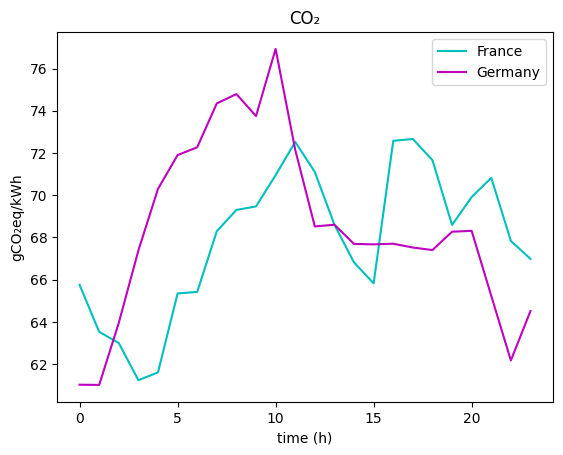

In [114]:
plt.plot(range(0,24),real_co2_emission_data,label='France', color='c')
plt.plot(range(0,24), real_co2_emission_data2, label='Germany', color='m')
plt.title("CO₂")
plt.xlabel("time (h)")
plt.ylabel("gCO₂eq/kWh")
plt.legend()
plt.savefig("CO2_Comparison_"+FOLDER+".pdf", bbox_inches="tight")

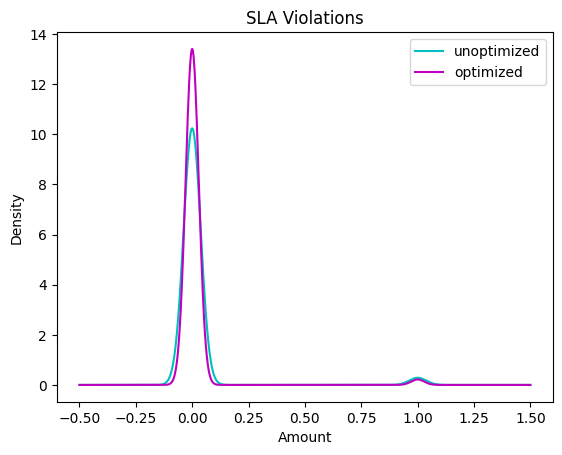

In [115]:
unoptimized['SLA'].plot(label='unoptimized', color='c', legend=True, kind='density')
optimized['SLA'].plot(label='optimized', color='m', legend=True, kind='density')
plt.title("SLA Violations")
plt.xlabel("Amount")
plt.savefig("Violations_"+FOLDER+".pdf", bbox_inches="tight")